Advanced Regression - Assignment Solution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from datetime import date
from sklearn.model_selection import train_test_split

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
houseData = pd.read_csv("train.csv")

In [3]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Verify and remove any columns which has unique values in it
houseData.shape
houseData=houseData.loc[:,houseData.nunique()!=1]
houseData.shape

(1460, 81)

In [6]:
#Remove any rows with duplicate data
len(houseData) - len(houseData.drop_duplicates())

0

In [7]:
# List of columns with null values
def missingDataPercentage(df):
    missingData = df[df.columns[df.isnull().any()]].isna().sum()
    print(missingData/len(df)*100)
missingDataPercentage(houseData)  

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [8]:
#Removing columns with the most number of null values 
#Columns Alley,FireplaceQu,PoolQC,Fence,MiscFeature,LotFrontage
houseData = houseData.drop(['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature','LotFrontage'], axis = 1) 
missingDataPercentage(houseData)

MasVnrType      0.547945
MasVnrArea      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64


In [9]:
def column_dataQuality(data,column):
    print(data[column].unique(),'\n')
    print('Null value percentage: ',data[column].isna().sum()*100/len(data[column]),'\n')
    print(data[column].describe())

In [10]:
column_dataQuality(houseData,'GarageType')

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types'] 

Null value percentage:  5.5479452054794525 

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object


In [11]:
column_dataQuality(houseData,'GarageYrBlt')

[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.] 

Null value percentage:  5.5479452054794525 

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


In [12]:
column_dataQuality(houseData,'GarageFinish')

['RFn' 'Unf' 'Fin' nan] 

Null value percentage:  5.5479452054794525 

count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object


In [13]:
column_dataQuality(houseData,'GarageQual') 

['TA' 'Fa' 'Gd' nan 'Ex' 'Po'] 

Null value percentage:  5.5479452054794525 

count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object


In [14]:
column_dataQuality(houseData,'GarageCond') 

['TA' 'Fa' nan 'Gd' 'Po' 'Ex'] 

Null value percentage:  5.5479452054794525 

count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object


In [15]:
#Imputing missing values for the categorical feature data 
for column in houseData[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType','Electrical']]:
    houseData[column].fillna(houseData[column].mode()[0], inplace=True)


In [16]:
missingDataPercentage(houseData)

MasVnrArea     0.547945
GarageYrBlt    5.547945
dtype: float64


In [17]:
#Imputing numerical data with median 
for column in houseData[['GarageYrBlt','MasVnrArea']]:
    houseData[column].fillna(houseData[column].median(), inplace=True)

#Checking whether any null values are present in the dataframe    
missingDataPercentage(houseData)
houseData.isnull().sum().sum()

Series([], dtype: float64)


0

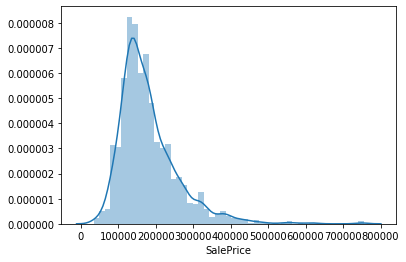

In [18]:
# target variable: price of house - how is it distributed
sns.distplot(houseData['SalePrice'])
plt.show()

In [19]:
#Creating the correlation series for all features against the sales price
def correlation_houseData(df):
    corr_houseData=df.corr()['SalePrice']
    return corr_houseData
correlation_houseData(houseData).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [20]:
#Listing the correlation values descending to see which features have high correlation towards the target feature


In [21]:
#Checking how the numerical data of the dataset is distributed (before doing any outlier treatment)
houseData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [22]:
#The feature overall Quality has the highest correlation towards the sale price of a house
#Comparing the overall quality of the house with the top 6 parametes to see how they are scattered

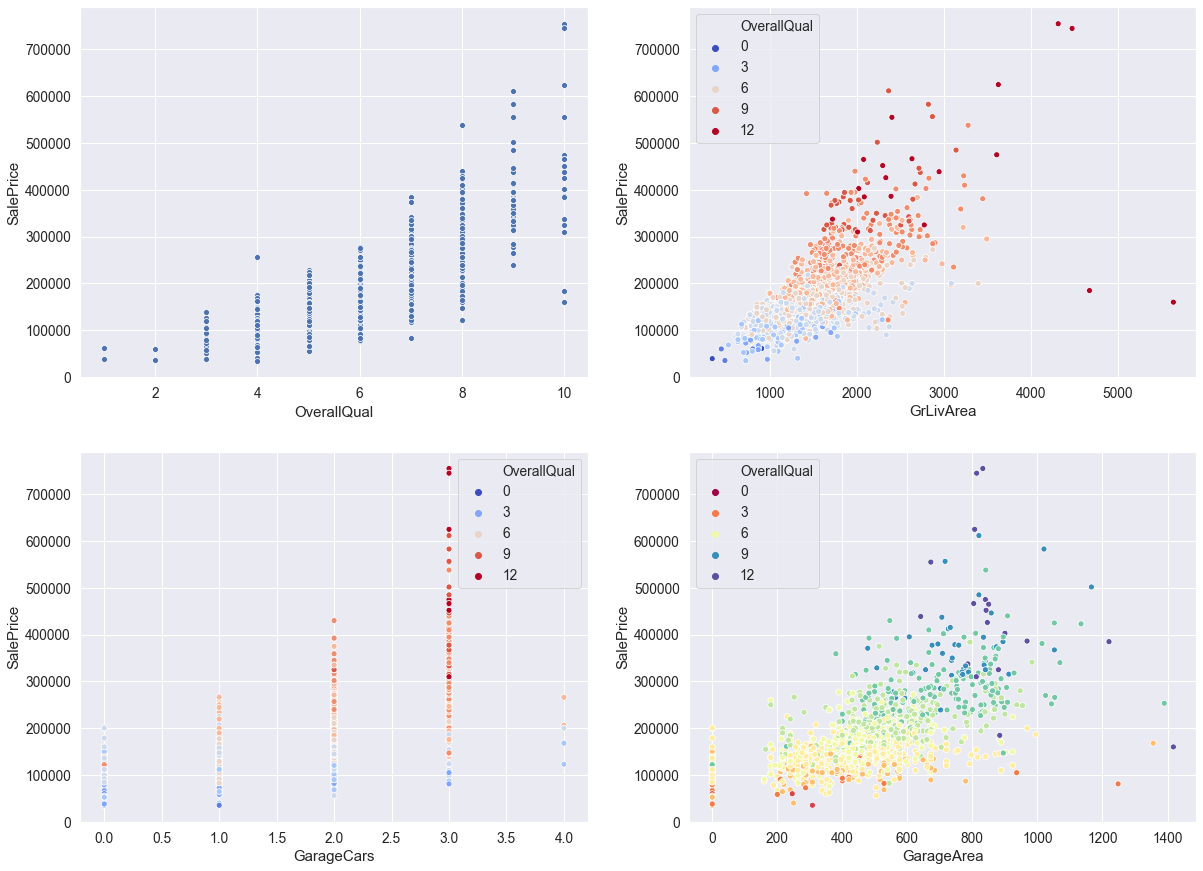

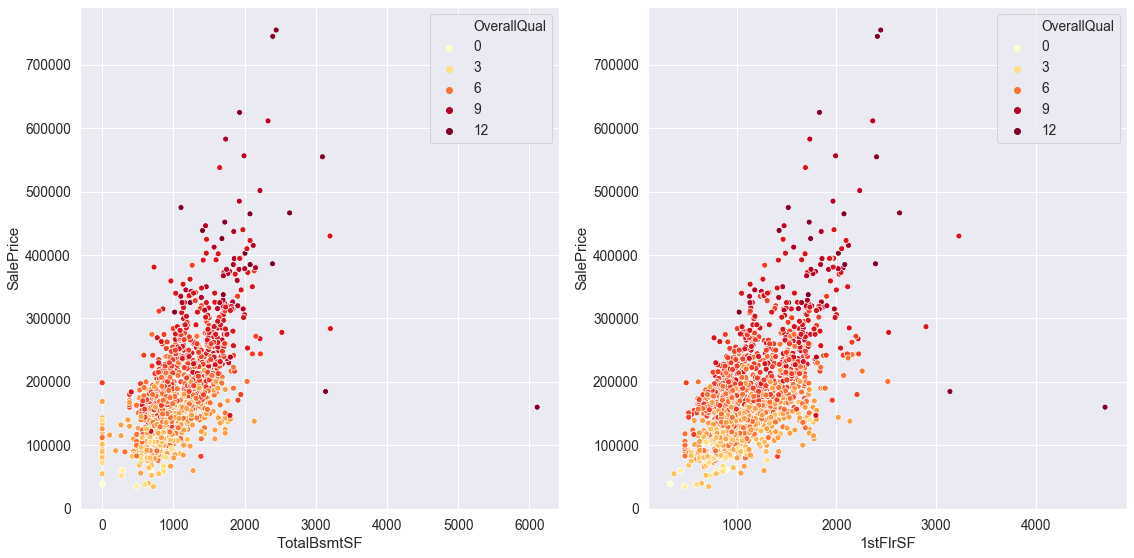

In [23]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.25)

#Box plot overallqual/salePrice
fig1 = fig.add_subplot(221); 
sns.scatterplot(x='OverallQual', y='SalePrice', data=houseData[['SalePrice', 'OverallQual']])

# GrLivArea vs SalePrice plot
fig2 = fig.add_subplot(222); 
sns.scatterplot(x = houseData.GrLivArea, y = houseData.SalePrice, hue=houseData.OverallQual, palette= 'coolwarm')

# GarageCars vs SalePrice plot
fig3 = fig.add_subplot(223); 
sns.scatterplot(x = houseData.GarageCars, y = houseData.SalePrice, hue=houseData.OverallQual, palette= 'coolwarm')

#GarageArea vs SalePrice plot
fig4 = fig.add_subplot(224); 
sns.scatterplot(x = houseData.GarageArea, y = houseData.SalePrice, hue=houseData.OverallQual, palette= 'Spectral')

fig5 = plt.figure(figsize=(16, 8))
fig6 = fig5.add_subplot(121); 
sns.scatterplot(y = houseData.SalePrice , x = houseData.TotalBsmtSF, hue=houseData.OverallQual, palette= 'YlOrRd')

fig7 = fig5.add_subplot(122); 
sns.scatterplot(y = houseData.SalePrice, x = houseData['1stFlrSF'], hue=houseData.OverallQual, palette= 'YlOrRd')

plt.tight_layout(); 
plt.show()

In [24]:
#We could see that there are some house prices under 200000 with high living area which is an anamoly as high living area usually directly correlates 
# to high house prices, so removing those rows

In [25]:
houseData = houseData.drop(houseData[(houseData.GrLivArea>4000) & (houseData.SalePrice<200000)].index)
houseData.shape

(1458, 75)

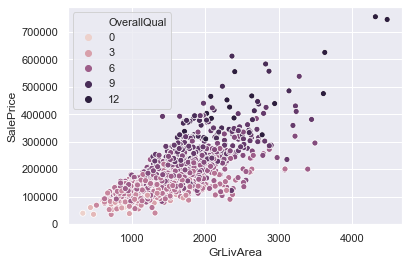

In [26]:
fig1 = fig.add_subplot(111);
sns.set(font_scale=1)
sns.scatterplot(x = houseData.GrLivArea, y = houseData.SalePrice, hue=houseData.OverallQual)

In [27]:
#Plotting the age of the house against the house sale price
today = date.today()
currYear = today.year
houseData['age'] = (currYear - houseData['YearBuilt'])


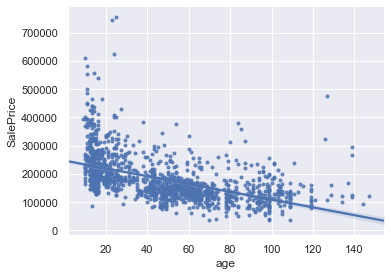

In [28]:
sns.lmplot(y = 'SalePrice', x = 'age', data=houseData, markers='.',aspect=1.4, height=4)
plt.show();  

In [29]:
#We can clearly see that newer the house, higher the price is. 

In [30]:
houseData.shape

(1458, 76)

In [31]:
#Categorical data - Encoding them into dummy variables

def find_categorical_columns(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    print("categorical columns : ",len(categorical_cols))
    return categorical_cols
    
categorical_cols =find_categorical_columns(houseData)  

categorical columns :  38


In [32]:
houseData[categorical_cols].nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          7
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [33]:
#Converting object type to category type of data for label encoding 

for column in categorical_cols:
    houseData[column] = houseData[column].astype('category')

In [34]:
houseData.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotArea             int64
Street           category
                   ...   
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice           int64
age                 int64
Length: 76, dtype: object

In [35]:
houseData.shape

(1458, 76)

In [36]:
#Label Encoder 

for column in categorical_cols:
    houseData[column]=houseData[column].cat.codes
houseData.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,age
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,2,2008,8,4,208500,16
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,5,2007,8,4,181500,43
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,9,2008,8,4,223500,18
3,4,70,3,9550,1,0,3,0,0,0,...,0,0,0,0,2,2006,8,0,140000,104
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,12,2008,8,4,250000,19


In [37]:
correlation_houseData(houseData).sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.795774
GrLivArea       0.734968
TotalBsmtSF     0.651153
GarageCars      0.641047
                  ...   
age            -0.523608
GarageFinish   -0.538326
KitchenQual    -0.592861
BsmtQual       -0.621404
ExterQual      -0.643381
Name: SalePrice, Length: 76, dtype: float64

### Data Preperation for model building 

In [38]:
# split into X and y
X = houseData.drop(['SalePrice'], axis=1)
X.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,16
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,43
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,18
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,104
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,19


In [39]:
y= houseData['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [40]:
### Feature Scaling

In [41]:
from sklearn.preprocessing import scale


In [42]:
# scaling the features

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

In [1274]:
X.describe()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age
count,1.458000e+03,1.458000e+03,1458.000000,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,...,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03
mean,-7.797451e-17,-8.223874e-17,0.000000,6.822770e-17,-3.106797e-16,-2.436703e-18,-7.675616e-17,-1.705692e-17,1.510756e-16,-7.310110e-18,...,-3.167715e-17,-4.873407e-18,4.020561e-17,4.873407e-18,1.218352e-17,5.117077e-17,1.503872e-14,3.289550e-17,5.726253e-17,1.462022e-17
std,1.000343e+00,1.000343e+00,1.000343,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-1.730311e+00,-8.718675e-01,-4.790647,-9.293940e-01,-1.555635e+01,-1.379805e+00,-3.970972e+00,-2.619813e-02,-1.863334e+00,-2.258788e-01,...,-3.596031e-01,-1.164201e-01,-2.704072e-01,-6.370868e-02,-8.774840e-02,-1.972053e+00,-1.367230e+00,-4.843384e+00,-3.425339e+00,-1.284875e+00
25%,-8.660475e-01,-8.718675e-01,-0.045563,-2.958088e-01,6.428243e-02,-1.379805e+00,3.123896e-01,-2.619813e-02,-6.295734e-01,-2.258788e-01,...,-3.596031e-01,-1.164201e-01,-2.704072e-01,-6.370868e-02,-8.774840e-02,-4.901545e-01,-6.144272e-01,3.125192e-01,2.100708e-01,-9.535670e-01
50%,5.891120e-04,-1.628977e-01,-0.045563,-9.993458e-02,6.428243e-02,7.497882e-01,3.123896e-01,-2.619813e-02,6.041874e-01,-2.258788e-01,...,-3.596031e-01,-1.164201e-01,-2.704072e-01,-6.370868e-02,-8.774840e-02,-1.196800e-01,1.383752e-01,3.125192e-01,2.100708e-01,-4.247014e-02
75%,8.648530e-01,3.097488e-01,-0.045563,1.156741e-01,6.428243e-02,7.497882e-01,3.123896e-01,-2.619813e-02,6.041874e-01,-2.258788e-01,...,-3.596031e-01,-1.164201e-01,-2.704072e-01,-6.370868e-02,-8.774840e-02,6.212690e-01,8.911776e-01,3.125192e-01,2.100708e-01,5.704496e-01
max,1.731490e+00,3.145628e+00,1.536132,2.077809e+01,6.428243e-02,7.497882e-01,3.123896e-01,3.817067e+01,6.041874e-01,7.012171e+00,...,8.669640e+00,1.720544e+01,8.335794e+00,1.925726e+01,3.114396e+01,2.103167e+00,1.643980e+00,3.125192e-01,1.118923e+00,3.287175e+00


In [1275]:
### Splitting the dataset into train and test


In [1276]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size = 0.3, random_state=100)                                                   

In [1277]:
#Building a linear regression model to find RFE  
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
 
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [1278]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Id', False, 42),
 ('MSSubClass', True, 1),
 ('MSZoning', False, 20),
 ('LotArea', True, 1),
 ('Street', False, 5),
 ('LotShape', False, 50),
 ('LandContour', False, 31),
 ('Utilities', False, 30),
 ('LotConfig', False, 49),
 ('LandSlope', False, 12),
 ('Neighborhood', False, 48),
 ('Condition1', False, 46),
 ('Condition2', False, 22),
 ('BldgType', False, 3),
 ('HouseStyle', False, 45),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 39),
 ('RoofStyle', False, 10),
 ('RoofMatl', False, 51),
 ('Exterior1st', False, 4),
 ('Exterior2nd', False, 15),
 ('MasVnrType', True, 1),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('ExterCond', False, 17),
 ('Foundation', False, 8),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 13),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 14),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 18),
 ('BsmtFinSF2', False, 2),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('Heating', F

In [1279]:
RFE_selected_Columns = X_train.columns[rfe.support_]


### Features selected by RFE for regression model

In [1280]:
RFE_selected_Columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'GarageCars', 'PoolArea', 'SaleCondition',
       'age'],
      dtype='object')

## Model Building and Evaluation

## Ridge and Lasso Regression

## RIDGE regression

In [1281]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.0005,0.001,0.01,0.02,0.03,0.04, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000,10000 ]}

ridge = Ridge()
# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 33 candidates, totalling 330 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:    2.3s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.01, 0.02, 0.03,
                                   0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1282]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=2000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005386,0.002102,0.001849,0.000284,0.0001,{'alpha': 0.0001},-17233.208936,-24130.210956,-23802.256710,-16618.943400,...,-17354.027630,-17953.181976,-18009.217777,-17576.820759,-17687.640563,-17914.804441,-17851.914238,-17578.295099,-17699.563227,218.211124
1,0.003677,0.001213,0.001294,0.000259,0.0005,{'alpha': 0.0005},-17233.207446,-24130.199953,-23802.257149,-16618.938098,...,-17354.025542,-17953.179541,-18009.214929,-17576.818525,-17687.639069,-17914.802612,-17851.912254,-17578.291955,-17699.561088,218.211009
2,0.004093,0.000691,0.001620,0.000487,0.001,{'alpha': 0.001},-17233.205585,-24130.186198,-23802.257698,-16618.931471,...,-17354.022933,-17953.176497,-18009.211368,-17576.815732,-17687.637201,-17914.800327,-17851.909774,-17578.288026,-17699.558416,218.210865
3,0.004823,0.001447,0.001605,0.000292,0.01,{'alpha': 0.01},-17233.172073,-24129.938630,-23802.267580,-16618.812186,...,-17353.975957,-17953.121710,-18009.147279,-17576.765467,-17687.603585,-17914.759188,-17851.865139,-17578.217298,-17699.510308,218.208277
4,0.003160,0.000368,0.001181,0.000234,0.02,{'alpha': 0.02},-17233.134840,-24129.663578,-23802.278550,-16618.679663,...,-17353.923765,-17953.060842,-18009.076852,-17576.709621,-17687.566236,-17914.713482,-17851.815548,-17578.138722,-17699.456937,218.205513


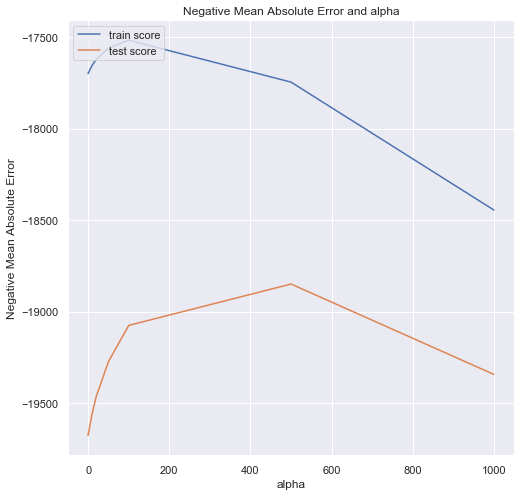

In [1283]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1284]:
alpha = 500
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_


array([ -376.30880936, -2068.19345283,  -131.67087958,  4612.31272689,
        1253.58767853,  -927.24042241,  -549.31877793,  -656.14351574,
        -211.10171451,   190.07632862,  1043.15371005,  -221.16286167,
         247.35030269, -2373.1118968 ,   316.76332943,  8648.70530538,
        2887.87291493,  1832.18456451,  1916.35596544,  2070.10394228,
        1362.40914139, -1254.74843659,  -297.36949332,  2959.68056702,
        5980.53885125, -6560.03800847,   623.49911738,  1509.41331155,
       -6352.0207153 ,   605.17923208, -2786.22095481,  -457.79125398,
        6547.467372  ,    27.70687736,   626.5494528 ,   351.88420063,
        7449.84168206,  -290.11257825, -2032.0054433 ,   625.16290271,
        -376.53640219,  7355.57636107,  6657.71681362,  -974.70333683,
       11002.76721317,  1392.81740403,  -359.25285954,  2979.17255379,
        2458.19337121, -1254.66223912, -2898.54369691, -6636.90654147,
        4343.71603573,  2947.46095839,  3486.62986964,   159.88384615,
      

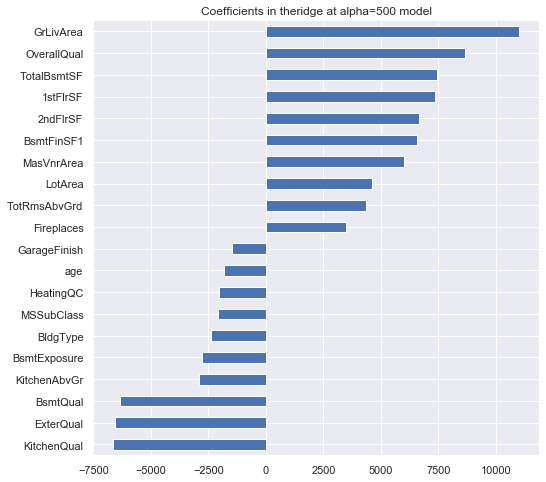

In [1285]:
def barh_graph(coefficient,modelType):
    coef = pd.Series(coefficient, index = X_train.columns)
    imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
    plt.rcParams['figure.figsize'] = (8.0, 8.0)
    imp_coef.plot(kind = "barh")
    plt.title("Coefficients in the"+modelType+"model")
    coef = pd.Series(coefficient, index = X_train.columns)
    imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
    plt.rcParams['figure.figsize'] = (8.0, 8.0)
    imp_coef.plot(kind = "barh")
    plt.title("Coefficients in the"+modelType+"model")
barh_graph(ridge.coef_,"ridge at alpha=500 ")

In [1286]:
### The top 5 features to use for ridge regression at alpha=500 would be GrLiveArea,OverallQual,TotalBsmtSF,1stFlSF,2ndFlSF

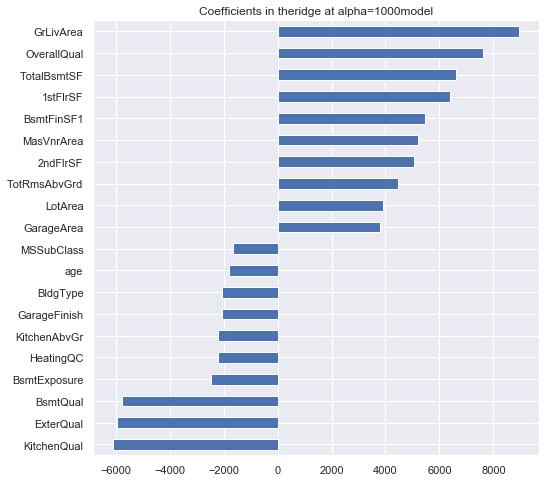

In [1287]:
alpha = 1000
ridge1000 = Ridge(alpha=alpha)
ridge1000.fit(X_train, y_train)
ridge1000.coef_
barh_graph(ridge1000.coef_,"ridge at alpha=1000")

In [1288]:
ridge1000.coef_

array([ -353.72460815, -1648.39261351,  -161.23129988,  3899.51261734,
         988.59441601, -1156.23507874,  -552.96189321,  -550.46480794,
        -254.08120181,   511.60161048,  1318.92141444,  -102.72089588,
         180.98571582, -2055.64309694,   503.94231159,  7621.51314316,
        1979.28748682,  1800.53192287,  2197.55200685,  2171.49232992,
        1446.43060238,  -748.9542856 ,  -213.8221026 ,  2178.82437406,
        5206.12671645, -5950.23947191,   471.92943561,  1440.37981556,
       -5746.39665539,   481.91178347, -2466.36746733,  -735.10016308,
        5483.04081425,   -61.70237131,   427.81586934,   686.19606749,
        6618.12304468,  -244.04146799, -2200.9752154 ,   849.71055427,
          48.44911977,  6402.03563438,  5050.5348037 ,  -723.57107902,
        8950.42356392,  1678.23034867,  -226.20824933,  3258.86128919,
        2399.27446963,  -121.90760989, -2190.67776329, -6089.64966597,
        4463.95977141,  2277.32974961,  3771.93874399,  -360.53564404,
      

In [1289]:
Ridge_train_score = ridge.score(X_train,y_train)
Ridge_test_score = ridge.score(X_test, y_test)

Ridge_train_score_1000 = ridge1000.score(X_train,y_train)
Ridge_test_score_1000 = ridge1000.score(X_test, y_test)
print("Ridge Train Score at alpha=500  :",Ridge_train_score)
print("Ridge Test Score at alpha=500  :",Ridge_test_score)
print("Difference:",Ridge_train_score-Ridge_test_score)
print("Ridge Train Score at alpha=1000  :",Ridge_train_score_1000)
print("Ridge Test Score at alpha=1000  :",Ridge_test_score_1000)
print("Difference:",Ridge_train_score_1000-Ridge_test_score_1000)


Ridge Train Score at alpha=500  : 0.8849975334831723
Ridge Test Score at alpha=500  : 0.8903169103203783
Difference: -0.005319376837205958
Ridge Train Score at alpha=1000  : 0.86832582231613
Ridge Test Score at alpha=1000  : 0.8786156387722948
Difference: -0.01028981645616478


### LASSO Regression

In [1290]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, return_train_score=True,verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 33 candidates, totalling 330 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:   18.7s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.01, 0.02, 0.03,
                                   0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1291]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.069852,0.006891,0.001543,0.000177,0.0001,{'alpha': 0.0001},-17233.208935,-24130.213315,-23802.256414,-16618.944428,...,-17354.028116,-17953.182534,-18009.218454,-17576.821312,-17687.640897,-17914.804846,-17851.914660,-17578.295820,-17699.563725,218.211140
1,0.066992,0.007285,0.001396,0.000206,0.0005,{'alpha': 0.0005},-17233.207440,-24130.211747,-23802.255667,-16618.943237,...,-17354.027972,-17953.182329,-18009.218311,-17576.821292,-17687.640739,-17914.804638,-17851.914362,-17578.295562,-17699.563579,218.211092
2,0.064399,0.002010,0.001484,0.000213,0.001,{'alpha': 0.001},-17233.205572,-24130.209787,-23802.254735,-16618.941749,...,-17354.027793,-17953.182073,-18009.218133,-17576.821268,-17687.640542,-17914.804378,-17851.913991,-17578.295240,-17699.563398,218.211031
3,0.061768,0.002831,0.001461,0.000152,0.01,{'alpha': 0.01},-17233.171947,-24130.174508,-23802.237947,-16618.914965,...,-17354.024555,-17953.177466,-18009.214920,-17576.820821,-17687.636993,-17914.799699,-17851.907301,-17578.289435,-17699.560127,218.209939
4,0.067984,0.005802,0.001588,0.000292,0.02,{'alpha': 0.02},-17233.134585,-24130.135309,-23802.219294,-16618.885204,...,-17354.020957,-17953.172348,-18009.211351,-17576.820325,-17687.633050,-17914.794500,-17851.899869,-17578.282985,-17699.556493,218.208725


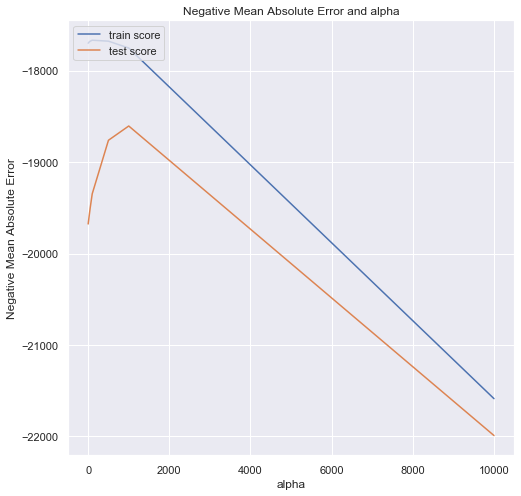

In [1292]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1293]:
#Lasso Regression at alpha=1000
alpha =1000
lasso = Lasso(alpha=alpha)       
lasso.fit(X_train, y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score)
print("test score: ", test_score)
print("difference",train_score-test_score)
print("number of features used: ", coeff_used)

#Lasso Regression at alpha=2000

lasso001 = Lasso(alpha=2000, max_iter=1000)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

print("training score:", train_score001)
print("test score: ", test_score001)
print("difference",train_score001-test_score001)
print("number of features used: ", coeff_used001)

#With alpha at 1000 and no of features at 34, i select the first lasso regression model and present the coefficients selected

training score: 0.8973920896037686
test score:  0.886784446002163
difference 0.010607643601605599
number of features used:  35
training score: 0.8895275884895926
test score:  0.8818908091838918
difference 0.007636779305700725
number of features used:  27


In [1294]:
lasso.coef_

array([   -0.        , -4003.35756444,    -0.        ,  5410.95558529,
         396.84699487,    -0.        ,    -0.        ,    -0.        ,
          -0.        ,    -0.        ,     0.        ,    -0.        ,
           0.        , -1132.24100546,     0.        , 11271.21962667,
        4111.41473495,  4779.91443415,     0.        ,   579.73813004,
           0.        ,  -988.57184443,    -0.        ,  3511.36951347,
        6033.19072628, -7242.7682297 ,    57.89035504,   436.21271118,
       -7116.42728824,   153.87406162, -3092.58979574,    -0.        ,
        8922.67716754,    -0.        ,   116.67786368,    -0.        ,
        8200.47523286,    -0.        ,  -192.99614537,     0.        ,
           0.        ,     0.        ,     0.        , -2126.78618814,
       34948.76517314,     0.        ,    -0.        ,     0.        ,
           0.        , -3445.13490889, -3436.41543358, -7066.83245881,
           0.        ,  3609.01295303,  1000.79872313,     0.        ,
      

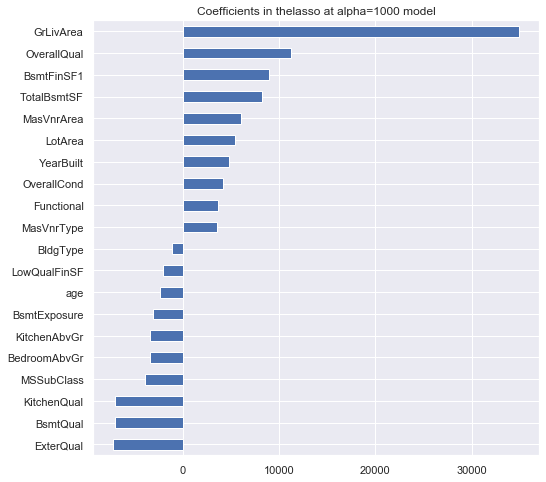

In [1295]:
barh_graph(lasso.coef_,"lasso at alpha=1000 ")

In [1296]:
# The top 5 feaatures for getting the best model would be GrLiveArea,OverallQuall,TotalBsmtSF,BsmtFinSF1,MasVnrArea

### Lasso Regression with removal of top 5 variables


In [1297]:
coef.sort_values().tail(10)

MasVnrType      3511.369513
Functional      3609.012953
OverallCond     4111.414735
YearBuilt       4779.914434
LotArea         5410.955585
MasVnrArea      6033.190726
TotalBsmtSF     8200.475233
BsmtFinSF1      8922.677168
OverallQual    11271.219627
GrLivArea      34948.765173
dtype: float64

In [1298]:
X_train.shape

(1020, 75)

In [1299]:
X_train = X_train.drop(['GrLivArea', 'OverallQual','TotalBsmtSF','BsmtFinSF1','MasVnrArea'], axis = 1)
X_train.shape

(1020, 70)

In [1303]:
alpha =1000
lasso1 = Lasso(alpha=alpha)       
lasso1.fit(X_train, y_train)
# cross validation
model_cv = GridSearchCV(estimator = lasso1, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, return_train_score=True,verbose = 1)            
model_cv.fit(X_train, y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

Fitting 10 folds for each of 33 candidates, totalling 330 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:   17.4s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.069027,0.011987,0.001593,0.000287,0.0001,{'alpha': 0.0001},-21440.478000,-26130.222512,-25755.666374,-18390.277851,...,-19188.853620,-19838.209310,-19799.025681,-19300.242547,-19607.319521,-19714.019122,-19835.567427,-19384.043846,-19497.108078,280.918652
1,0.058172,0.005323,0.001414,0.000178,0.0005,{'alpha': 0.0005},-21440.477035,-26130.220921,-25755.665522,-18390.276597,...,-19188.853248,-19838.209091,-19799.025487,-19300.242362,-19607.319357,-19714.018814,-19835.567011,-19384.043411,-19497.107810,280.918638
2,0.059559,0.001229,0.001529,0.000050,0.001,{'alpha': 0.001},-21440.475830,-26130.218932,-25755.664457,-18390.275030,...,-19188.852783,-19838.208817,-19799.025244,-19300.242131,-19607.319152,-19714.018428,-19835.566491,-19384.042867,-19497.107474,280.918620
3,0.058950,0.001334,0.001428,0.000175,0.01,{'alpha': 0.01},-21440.454136,-26130.183139,-25755.645290,-18390.246811,...,-19188.844416,-19838.203881,-19799.020871,-19300.237966,-19607.315460,-19714.011490,-19835.557131,-19384.033075,-19497.101444,280.918299
4,0.060150,0.000788,0.001476,0.000166,0.02,{'alpha': 0.02},-21440.430031,-26130.143368,-25755.623994,-18390.215457,...,-19188.835120,-19838.198397,-19799.016012,-19300.233338,-19607.311359,-19714.003781,-19835.546731,-19384.022195,-19497.094743,280.917943


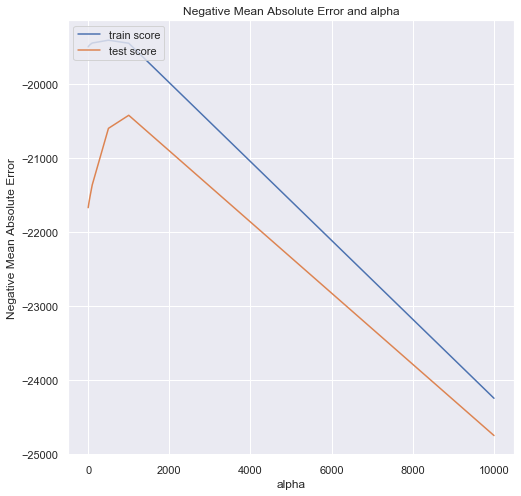

In [1304]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

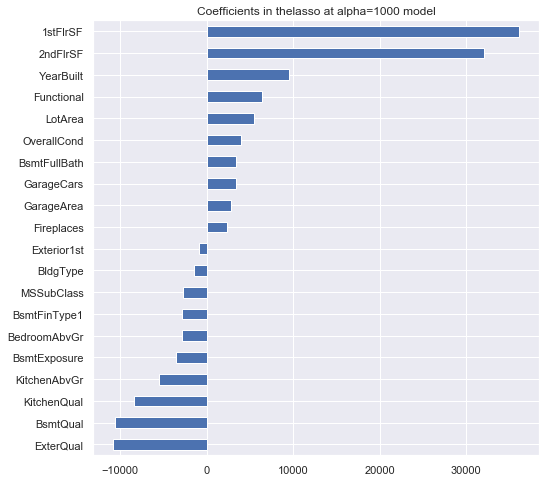

In [1306]:
barh_graph(lasso1.coef_,"lasso at alpha=1000 ")